### Redes Neurais e Arquiteturas Profundas
#### **MBA em Ciências de Dados**

### *Módulo 3 - Arquiteturas de CNNS e treinamento de redes profundas*

**Parte 1 - Entendendo a função de custo entropia cruzada (cross-entropy)**

Moacir A. Ponti - ICMC/USP

-


A **entropia cruzada** é amplamente utilizada, mas, ao contrário da **perda quadrática**, mais conhecida e de fácil interpretação, não é tão intuitiva.

Há dois formatos básicos dessa função:

* Entropia cruzada binária: utilizada para duas classes
$$-\frac{1}{N} \sum_{i=1}^N y_i \log \hat{y}_i + (1-y_i) \log (1-\hat{y}_i)$$

* Entropia cruzada categórica: problemas multiclasse
$$-\frac{1}{N} \sum_{i=1}^N \sum_{c=1}^C \hat{y}_{i,c} \log y_{i,c}$$


In [110]:
import numpy as np
import matplotlib.pyplot as plt

[0.     0.0526 0.1053 0.1579 0.2105 0.2632 0.3158 0.3684 0.4211 0.4737
 0.5263 0.5789 0.6316 0.6842 0.7368 0.7895 0.8421 0.8947 0.9474 1.    ]


Text(0.5, 0, 'em relaçao a 1.0')

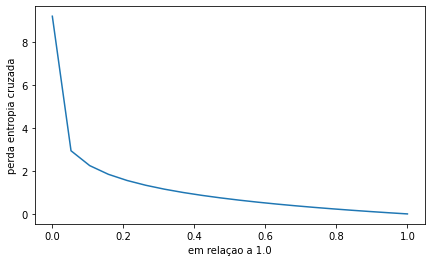

In [147]:
y = 1
y_hat = np.linspace(0,1,20)

print(np.round(y_hat,4))

loss_ec = -(y*np.log(y_hat+.0001) + (1-y)*np.log(1-y_hat +.0001))

plt.figure(figsize=(7,4))
plt.plot(y_hat, loss_ec)
plt.ylabel('perda entropia cruzada')
plt.xlabel('em relaçao a %.1f' % (y))

Vamos comparar com a perda quadrática, por ilustração

Text(0.5, 0, 'em relaçao a 0.0')

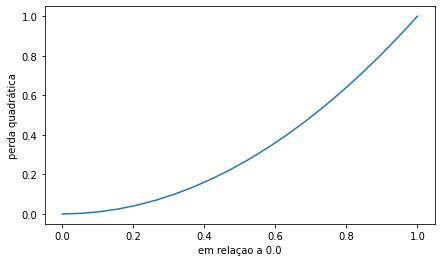

In [150]:
loss_q = np.power(y-y_hat,2)
plt.figure(figsize=(7,4))
plt.plot(y_hat, loss_q)
plt.ylabel('perda quadrática')
plt.xlabel('em relaçao a %.1f' % (y))

Vamos estudar um exemplo em 1D

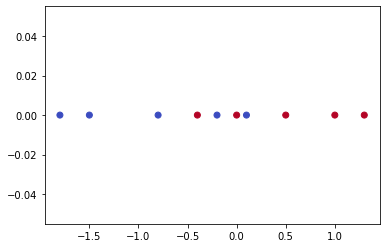

In [135]:
x = np.array([-1.8,-1.5,-0.8,-0.4,-0.2, 0.0, 0.1, 0.5, 1.0, 1.3])
y = np.array([ 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,  1.0, 1.0, 1.0])

plt.scatter(x,np.zeros(10), c=y,cmap=plt.cm.coolwarm)

Treinando um classificador para diferenciar as duas classes (0 e 1)

In [137]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(solver='lbfgs')
logr.fit(x.reshape(-1, 1), y)

# vamos pegar as probabilidades de cada elemento pertencer a classe 1
y_hat = logr.predict_proba(x.reshape(-1, 1))[:, 1].ravel()

# para obter as classes, fazemos uma limiarizacao das probabilidades
y_clas = y_hat.copy()
y_clas[y_clas>=0.5] = 1
y_clas[y_clas<0.5] = 0
print('classes       = {}'.format(np.round(y_clas, 3)))
print('p(y)          = {}'.format(np.round(y_hat, 3)))


classes       = [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
p(y)          = [0.133 0.178 0.325 0.433 0.49  0.547 0.576 0.682 0.792 0.843]


In [138]:
celoss_ind = -(y*np.log(y_hat+.00001) + (1-y)*np.log(1-y_hat +.00001))
print('p(y)          = {}'.format(np.round(y_hat, 3)))
print('Por instancia = {}'.format(np.round(celoss_ind,3)))

print('Cross Entropy (média) = %.3f' % (np.mean(celoss_ind)))

p(y)          = [0.133 0.178 0.325 0.433 0.49  0.547 0.576 0.682 0.792 0.843]
Por instancia = [0.142 0.195 0.394 0.837 0.674 0.603 0.857 0.382 0.233 0.17 ]
Cross Entropy (média) = 0.449


---
Adicionando uma nova classe ao problema, note que a função:
$$-\frac{1}{N} \sum_{i=1}^N y_i \log \hat{y}_i + (1-y_i) \log (1-\hat{y}_i)$$
não seria mais possível calcular como antes.

Assim, adotamos a entropia cruzada categórica, somando as divergências para cada classe

$$-\frac{1}{N} \sum_{i=1}^N \sum_{c=1}^C \hat{y}_{i,c} \log y_{i,c}$$


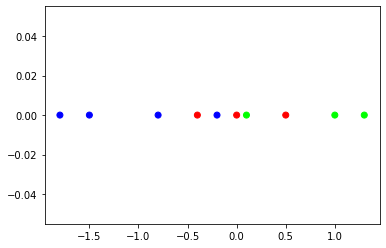

In [104]:
x2 = np.array([-1.8,-1.5,-0.8,-0.4,-0.2, 0.0, 0.1, 0.5, 1.0, 1.3])
y2 = np.array([ 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 2.0,  1.0, 2.0, 2.0])
plt.scatter(x2,np.zeros(10), c=y2,cmap=plt.cm.brg)

In [140]:
logr = LogisticRegression(solver='lbfgs')
logr.fit(x2.reshape(-1, 1), y2)

# agora as probabilidades são para 3 classes
# então uma única probabilidade não é suficiente para obter a resposta
y2_hat = logr.predict_proba(x2.reshape(-1, 1))
print(np.round(y2_hat,4))

[[0.856  0.1229 0.0211]
 [0.7999 0.1636 0.0364]
 [0.6033 0.2821 0.1146]
 [0.4587 0.3441 0.1971]
 [0.3851 0.3659 0.2489]
 [0.3149 0.379  0.3061]
 [0.282  0.3819 0.3362]
 [0.1704 0.3701 0.4595]
 [0.0806 0.3162 0.6032]
 [0.0491 0.2742 0.6768]]


Como os rótulos estão em formato discreto, vamos obter one-hot-encodings para computar o custo

In [143]:
from tensorflow import keras
y2_onehot = keras.utils.to_categorical(y2, 3)

print('y one-hot-enc.= \n', np.round(y2_onehot, 3))
print('p(y)          = \n', np.round(y2_hat, 3))

celoss_ind2 = -(y2_onehot*np.log(y2_hat+.0001))
print('Por instancia = \n', np.round(celoss_ind2,3))

print('Cross Entropy (média) = %.3f' % (np.mean(celoss_ind2[:])))

y one-hot-enc.= 
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
p(y)          = 
 [[0.856 0.123 0.021]
 [0.8   0.164 0.036]
 [0.603 0.282 0.115]
 [0.459 0.344 0.197]
 [0.385 0.366 0.249]
 [0.315 0.379 0.306]
 [0.282 0.382 0.336]
 [0.17  0.37  0.459]
 [0.081 0.316 0.603]
 [0.049 0.274 0.677]]
Por instancia = 
 [[0.155 0.    0.   ]
 [0.223 0.    0.   ]
 [0.505 0.    0.   ]
 [0.    1.066 0.   ]
 [0.954 0.    0.   ]
 [0.    0.97  0.   ]
 [0.    0.    1.09 ]
 [0.    0.994 0.   ]
 [0.    0.    0.505]
 [0.    0.    0.39 ]]
Cross Entropy (média) = 0.228
